In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
data=pd.read_csv('/kaggle/input/titanic/train.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')
gender=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [3]:
data.shape

(891, 12)

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<BarContainer object of 2 artists>

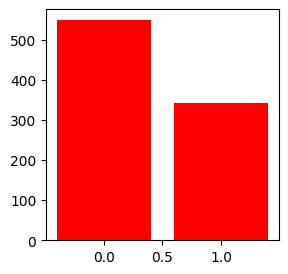

In [8]:
plt.figure(figsize=(3,3))
plt.bar(list(data['Survived'].value_counts().keys()),list(data['Survived'].value_counts()),color='r')

In [9]:
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

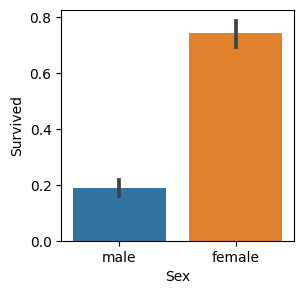

In [10]:
plt.figure(figsize=(3,3))
sns.barplot(x=data.Sex, y=data.Survived)


<Axes: xlabel='Pclass', ylabel='Survived'>

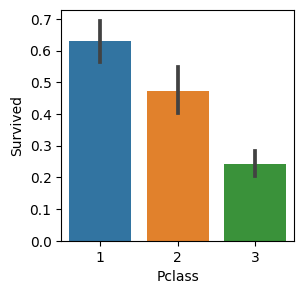

In [11]:
plt.figure(figsize=(3,3))

sns.barplot(x=data.Pclass, y=data.Survived)


In [12]:
sum(data['Pclass'].isnull())

0

In [13]:
sum(data['SibSp'].isnull())

0

In [14]:
sum(data['Parch'].isnull())

0

In [15]:
data= data.dropna(axis=0)

In [16]:
data['Age'].value_counts()

Age
36.0    11
24.0     9
19.0     6
35.0     6
31.0     5
        ..
71.0     1
3.0      1
1.0      1
36.5     1
26.0     1
Name: count, Length: 63, dtype: int64

In [17]:
data['Pclass'].value_counts()

Pclass
1    158
2     15
3     10
Name: count, dtype: int64

In [18]:
from xgboost import XGBClassifier 
f=["Pclass","Sex","Parch","SibSp"]

y= data["Survived"]
x = pd.get_dummies(data[f])
#X_train, X_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state = 42)
test_x=pd.get_dummies(test[f])
# model = XGBClassifier (n_estimators=50, learning_rate=0.05, n_jobs=4)
# model.fit(X_train,y_train )
# predictions = model.predict(X_val)




In [19]:
# from sklearn.metrics import accuracy_score
# accuracy_score(y_val,predictions)

In [20]:
model_1 = XGBClassifier (n_estimators=50, learning_rate=0.05, n_jobs=4)
model_1.fit(x,y)
predictions_1 = model_1.predict(test_x)

In [21]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions_1})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
